In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("drive/MyDrive/pca_reduced_dataset.csv")

In [3]:
print(f"Dataset shape: {df.shape}")
print(f"Features: {list(df.columns[:-1])}")
print(f"Target variable: Churn")
print(f"Class distribution:")
print(df['Churn'].value_counts())
print(f"Percentage distribution:")
print(df['Churn'].value_counts(normalize=True) * 100)

Dataset shape: (7043, 15)
Features: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14']
Target variable: Churn
Class distribution:
Churn
0    5174
1    1869
Name: count, dtype: int64
Percentage distribution:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


Variety 1 - Basic SVM

In [2]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split dataset test 20% train 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (5634, 14)
Test set: (1409, 14)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_basic = SVC(kernel='rbf', probability=True, random_state=42)
svm_basic.fit(X_train_scaled, y_train)

# Make predictions
y_pred_basic = svm_basic.predict(X_test_scaled)
y_pred_proba_basic = svm_basic.predict_proba(X_test_scaled)[:, 1]

In [7]:
accuracy_basic = accuracy_score(y_test, y_pred_basic)
precision_basic = precision_score(y_test, y_pred_basic)
recall_basic = recall_score(y_test, y_pred_basic)
f1_basic = f1_score(y_test, y_pred_basic)
auc_basic = roc_auc_score(y_test, y_pred_proba_basic)

print(f"Accuracy:  {accuracy_basic:.4f}")
print(f"Precision: {precision_basic:.4f}")
print(f"Recall:    {recall_basic:.4f}")
print(f"F1-Score:  {f1_basic:.4f}")
print(f"AUC-ROC:   {auc_basic:.4f}")

Accuracy:  0.7878
Precision: 0.6307
Recall:    0.4840
F1-Score:  0.5477
AUC-ROC:   0.8143


Confusion Matrix:
[[929 106]
 [193 181]]


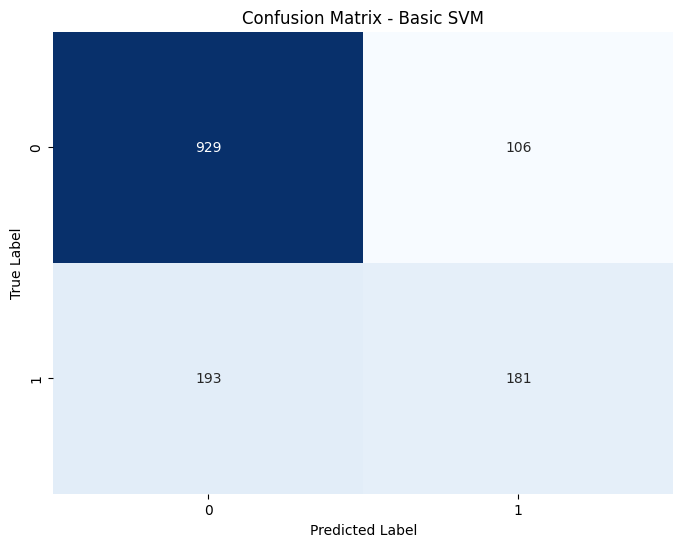

In [9]:
cm_basic = confusion_matrix(y_test, y_pred_basic)
print("Confusion Matrix:")
print(cm_basic)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_basic, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Basic SVM')
plt.show()

In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred_basic))

# Cross validation
cv_basic = cross_val_score(svm_basic, scaler.fit_transform(X), y, cv=5, scoring='accuracy')
print(f"Cross-validation: {cv_basic.mean():.4f} (+/- {cv_basic.std() * 2:.4f})")

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Cross-validation: 0.7978 (+/- 0.0107)


Variety 2 - Linear SVM

In [11]:
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Make predictions
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_proba_linear = svm_linear.predict_proba(X_test_scaled)[:, 1]

In [12]:
accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear)
recall_linear = recall_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)
auc_linear = roc_auc_score(y_test, y_pred_proba_linear)

print(f"Accuracy:  {accuracy_linear:.4f}")
print(f"Precision: {precision_linear:.4f}")
print(f"Recall:    {recall_linear:.4f}")
print(f"F1-Score:  {f1_linear:.4f}")
print(f"AUC-ROC:   {auc_linear:.4f}")


Accuracy:  0.7942
Precision: 0.6346
Recall:    0.5294
F1-Score:  0.5773
AUC-ROC:   0.8349


Confusion Matrix:
[[921 114]
 [176 198]]


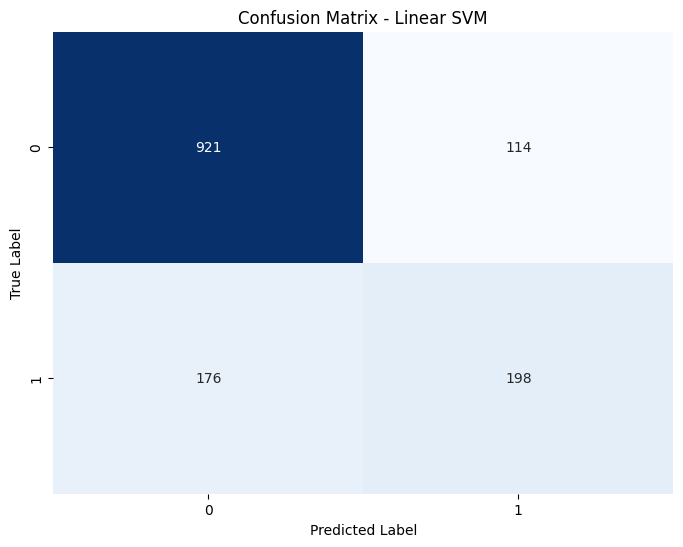

In [13]:
cm_linear = confusion_matrix(y_test, y_pred_linear)
print("Confusion Matrix:")
print(cm_linear)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Linear SVM')
plt.show()

In [14]:
print("Classification Report:")
print(classification_report(y_test, y_pred_linear))

# Cross validation
cv_linear = cross_val_score(svm_linear, scaler.fit_transform(X), y, cv=5, scoring='accuracy')
print(f"Cross-validation: {cv_linear.mean():.4f} (+/- {cv_linear.std() * 2:.4f})")

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

Cross-validation: 0.8019 (+/- 0.0129)


Variety 3 - Tuned SVM

In [15]:
svm_tuned = SVC(kernel='rbf', C=10, gamma=0.01, probability=True, random_state=42)
svm_tuned.fit(X_train_scaled, y_train)

# Make predictions
y_pred_tuned = svm_tuned.predict(X_test_scaled)
y_pred_proba_tuned = svm_tuned.predict_proba(X_test_scaled)[:, 1]

In [16]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)
auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

print(f"Accuracy:  {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall:    {recall_tuned:.4f}")
print(f"F1-Score:  {f1_tuned:.4f}")
print(f"AUC-ROC:   {auc_tuned:.4f}")

Accuracy:  0.7928
Precision: 0.6424
Recall:    0.4947
F1-Score:  0.5589
AUC-ROC:   0.8289


Confusion Matrix:
[[932 103]
 [189 185]]


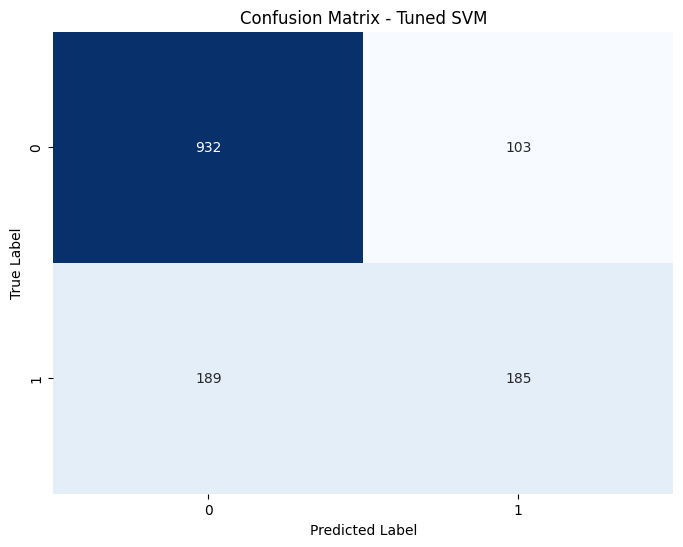

In [19]:
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix:")
print(cm_tuned)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Tuned SVM')
plt.show()

In [18]:
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# Cross validation
cv_tuned = cross_val_score(svm_tuned, scaler.fit_transform(X), y, cv=5, scoring='accuracy')
print(f"Cross-validation: {cv_tuned.mean():.4f} (+/- {cv_tuned.std() * 2:.4f})")

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Cross-validation: 0.8031 (+/- 0.0163)


Comparison

In [20]:
comparison_df = pd.DataFrame({
    'Model': ['SVM Basic', 'SVM Linear', 'SVM Tuned'],
    'Accuracy': [accuracy_basic, accuracy_linear, accuracy_tuned],
    'Precision': [precision_basic, precision_linear, precision_tuned],
    'Recall': [recall_basic, recall_linear, recall_tuned],
    'F1-Score': [f1_basic, f1_linear, f1_tuned],
    'AUC-ROC': [auc_basic, auc_linear, auc_tuned],
    'CV_Score': [cv_basic.mean(), cv_linear.mean(), cv_tuned.mean()]
})

print(comparison_df.round(4))

        Model  Accuracy  Precision  Recall  F1-Score  AUC-ROC  CV_Score
0   SVM Basic    0.7878     0.6307  0.4840    0.5477   0.8143    0.7978
1  SVM Linear    0.7942     0.6346  0.5294    0.5773   0.8349    0.8019
2   SVM Tuned    0.7928     0.6424  0.4947    0.5589   0.8289    0.8031


In [21]:
best_models = {}
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'CV_Score']:
    best_idx = comparison_df[metric].idxmax()
    best_model = comparison_df.loc[best_idx, 'Model']
    best_score = comparison_df.loc[best_idx, metric]
    best_models[metric] = (best_model, best_score)
    print(f"{metric:12}: {best_model} ({best_score:.4f})")

# Find overall best model (based on F1-Score as balanced metric)
overall_best_model = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
overall_best_f1 = comparison_df['F1-Score'].max()

print(f"OVERALL BEST MODEL: {overall_best_model}")
print(f"Best F1-Score: {overall_best_f1:.4f}")

Accuracy    : SVM Linear (0.7942)
Precision   : SVM Tuned (0.6424)
Recall      : SVM Linear (0.5294)
F1-Score    : SVM Linear (0.5773)
AUC-ROC     : SVM Linear (0.8349)
CV_Score    : SVM Tuned (0.8031)
OVERALL BEST MODEL: SVM Linear
Best F1-Score: 0.5773


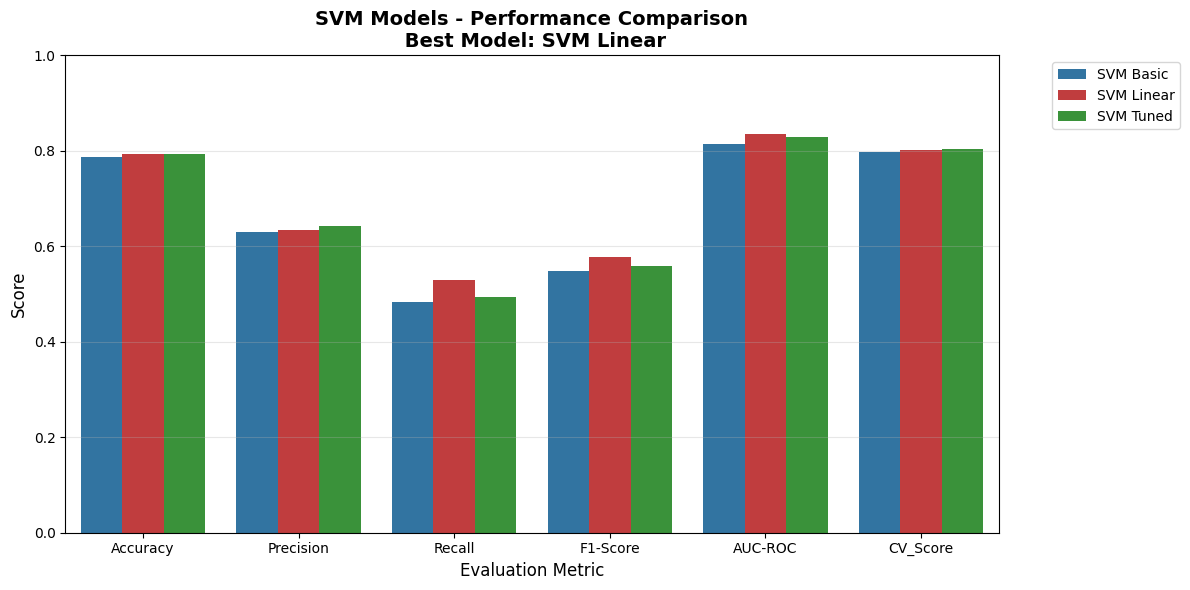

In [24]:
comparison_melted = comparison_df.melt(
    'Model',
    var_name='Metric',
    value_name='Score',
    value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC', 'CV_Score']
)

# Highlight the best model in the plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
highlight_color = '#d62728'  # Red for best model

# Find index of best model
best_model_idx = comparison_df['Model'].tolist().index(overall_best_model)

# Create custom palette with best model highlighted
custom_palette = [highlight_color if i == best_model_idx else colors[i] for i in range(3)]

plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=comparison_melted,
            palette=custom_palette)
plt.title(f'SVM Models - Performance Comparison\n Best Model: {overall_best_model}',
          fontsize=14, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Evaluation Metric', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()